In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("combined_coin_gecko.csv")

In [3]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755304e+09
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803783e+10
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11


In [4]:
df.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [6]:
# these are the features with nan value

df.isnull().sum()

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [7]:
# Fill missing values
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('Unknown')
        else:
            df[col] = df[col].fillna(df[col].median())
    return df


- **Why we are using Median instead of Mean or Mode?**
    - The median is the most informative measure of central tendency for skewed distributions or distributions with outliers. For example, the median is often used as a measure of central tendency for income distributions, which are generally highly skewed

In [8]:
# Fill missing values in  and Impute Median value

fill_missing_values(df)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17
996,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17
997,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17
998,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17


In [9]:
# check the null values 

df.isnull().sum()

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

**Handling Duplicates**

In [10]:
df.duplicated().sum()

0

**not a  Duplicates values in data**

# Feature Engineering

In [11]:
df.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')

#### changer columns name


In [12]:
df["one_hour"] = df["1h"]
df["twentyfour_hour"] = df["24h"]
df["seven_day"] = df["7d"]
df["twentyfour_hour_volume"] = df["24h_volume"]


In [13]:
df.columns


Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date', 'one_hour', 'twentyfour_hour', 'seven_day',
       'twentyfour_hour_volume'],
      dtype='object')

In [14]:
# remove columns 

remove =["1h","24h","7d","24h_volume"]

df.drop(remove , axis=1 , inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coin                    1000 non-null   object 
 1   symbol                  1000 non-null   object 
 2   price                   1000 non-null   float64
 3   mkt_cap                 1000 non-null   float64
 4   date                    1000 non-null   object 
 5   one_hour                1000 non-null   float64
 6   twentyfour_hour         1000 non-null   float64
 7   seven_day               1000 non-null   float64
 8   twentyfour_hour_volume  1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [16]:
fill_missing_values(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coin                    1000 non-null   object 
 1   symbol                  1000 non-null   object 
 2   price                   1000 non-null   float64
 3   mkt_cap                 1000 non-null   float64
 4   date                    1000 non-null   object 
 5   one_hour                1000 non-null   float64
 6   twentyfour_hour         1000 non-null   float64
 7   seven_day               1000 non-null   float64
 8   twentyfour_hour_volume  1000 non-null   float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


**Numeric Features**

In [17]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 6


**Categorical Features**

In [18]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 3


In [19]:
cat_features

['coin', 'symbol', 'date']

**Discrete Features**

In [20]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


**Continues Features**

In [21]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 6


### Check Outlier and Capping it

**Why outliers?**
* Data Entry error : Human error. 
* Measurement error: Instrument error. 
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

**Why IQR For Outlier Handling?**
* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

* The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

* where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

## Outliers Detection

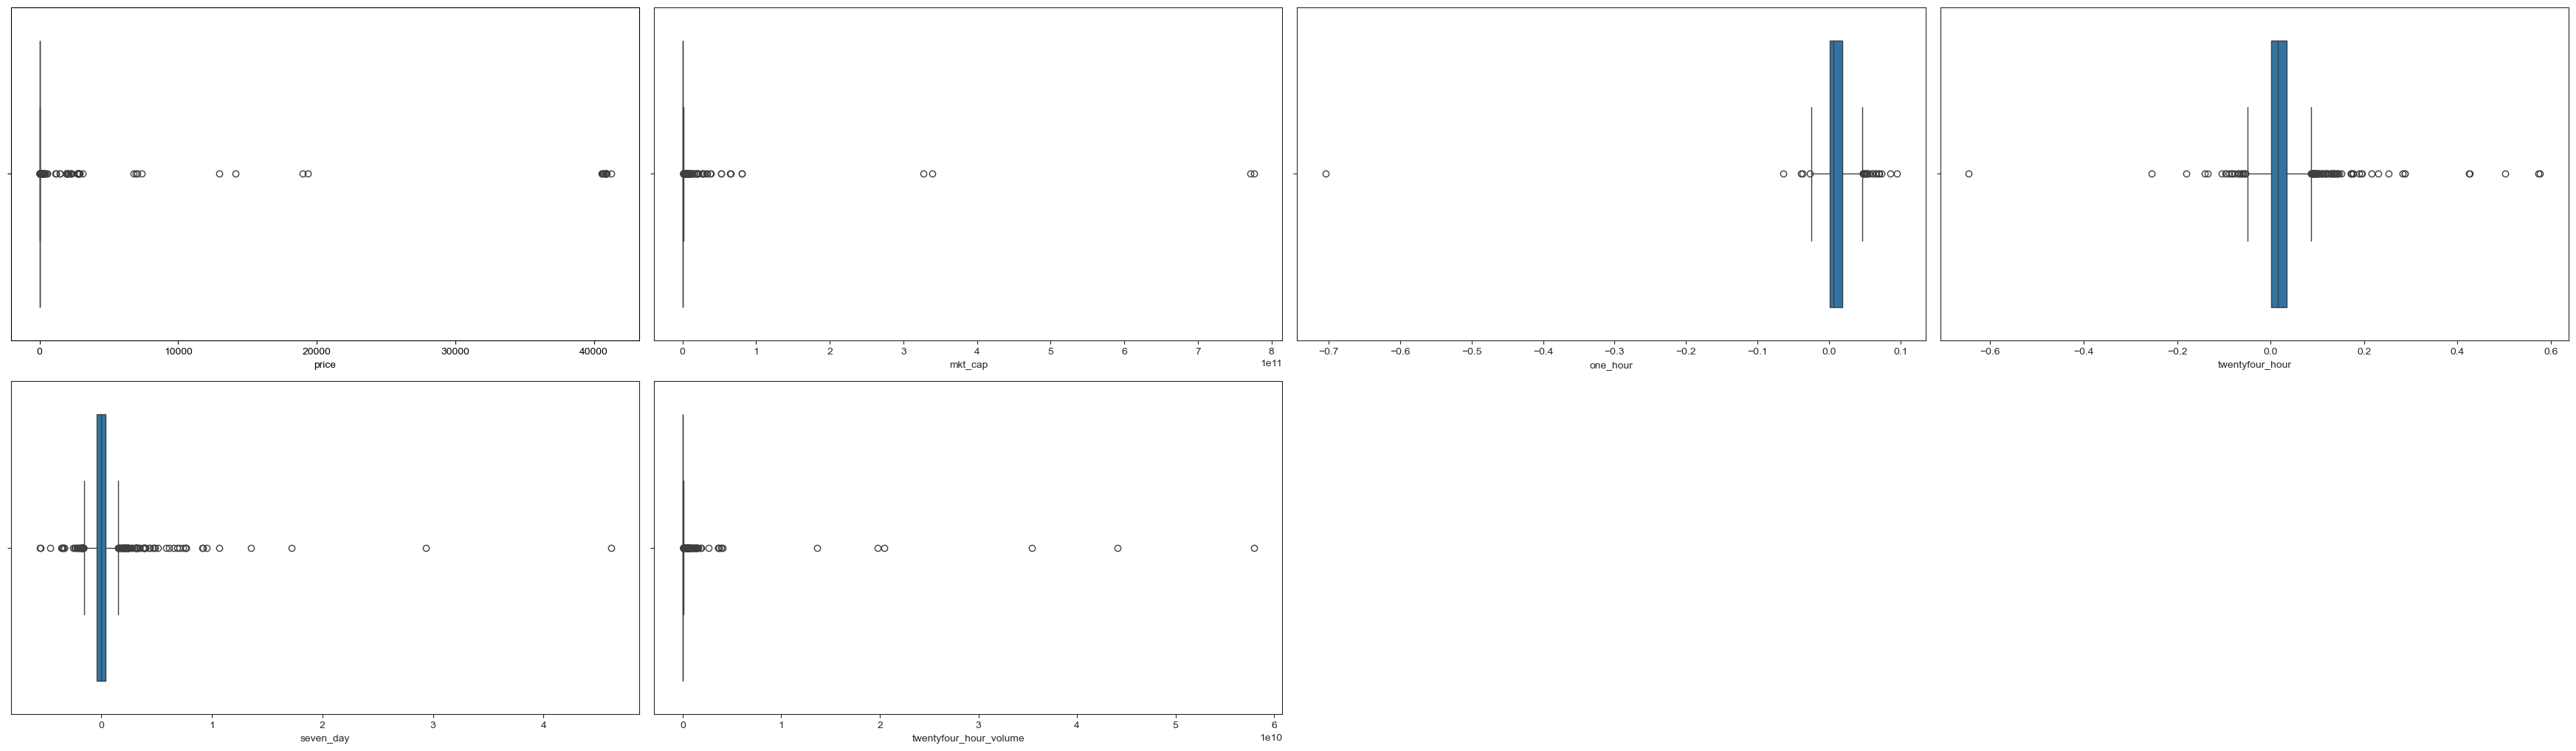

In [22]:
num_features = num_features.copy()
plt.figure(figsize=(35, 20))

for i in range(len(num_features)):
    plt.subplot(4, 4, i+1)
    sns.set_style('ticks')
    plt.xlabel(num_features[i])
    sns.boxplot(x=df[num_features[i]])

plt.tight_layout()
plt.show()

**report**
- We can see, there are  such outliers in following columns 
    - price
    - mkt_cap
    - date one_hour
    - twentyfour_hour
    - seven_day 
    - twentyfour_hour_volume

**Detecting Outlier and Capping it**

In [23]:
def detect_outliers_iqr(df, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = len(outliers)

    return pd.Series(outlier_summary, name="Outlier Count")


In [24]:
outlier_counts = detect_outliers_iqr(df, num_features)
print(outlier_counts)


price                     187
mkt_cap                   162
one_hour                   27
twentyfour_hour            92
seven_day                 105
twentyfour_hour_volume    147
Name: Outlier Count, dtype: int64


**Checking Skewness after Outlier Capping**

In [25]:
df[continuous_features].skew(axis=0, skipna=True)

price                      8.273078
mkt_cap                   17.961692
one_hour                 -18.674333
twentyfour_hour            1.770397
seven_day                 11.257053
twentyfour_hour_volume    16.090037
dtype: float64

## Feature Transformation

### Scaling 
- **What is Feature Scaling**
    - Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
- **Why we use feature scaling?**
    - the feature scaling was implemented to prevent any skewness in the contour plot of the cost function which affects the gradient descent but the analytical solution using normal equation does not suffer from the same drawback.

- Pipeline
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__' .


In [26]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

outlier_features = ['price','one_hour','twentyfour_hour', 'seven_day', 'twentyfour_hour_volume','mkt_cap' ]

numeric_features = [x for x in numeric_features if x not in outlier_features]

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

# Load dataset
data = df.copy()

# Drop non-numeric columns
data = data.drop(columns=['coin', 'symbol'])

# Identify features
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
outlier_features = outlier_features  

# Numeric pipeline: Impute missing with 0 then scale
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Outlier-sensitive pipeline: Impute missing then PowerTransform
outlier_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('power_transform', PowerTransformer(standardize=True))
])

# Combine pipelines with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numeric_pipeline', numeric_pipeline, numeric_features),
    ('outlier_pipeline', outlier_features_pipeline, outlier_features)
])

# Fit and transform data
data_transformed = preprocessor.fit_transform(data)

# Get final feature names
columns = preprocessor.get_feature_names_out()

# Wrap into final DataFrame
scaled_data = pd.DataFrame(data_transformed, columns=columns)

# View result
print("After scaling, let's have a glimpse of the scaled dataset :")
scaled_data.head()



After scaling, let's have a glimpse of the scaled dataset :


,numeric_pipeline__price,numeric_pipeline__mkt_cap,numeric_pipeline__one_hour,numeric_pipeline__twentyfour_hour,numeric_pipeline__seven_day,numeric_pipeline__twentyfour_hour_volume,outlier_pipeline__price,outlier_pipeline__one_hour,outlier_pipeline__twentyfour_hour,outlier_pipeline__seven_day,outlier_pipeline__twentyfour_hour_volume,outlier_pipeline__mkt_cap
0,8.773501,20.180439,0.458586,0.106943,0.138288,12.723676,1.975569,0.704866,0.127554,0.438347,3.815268,2.193653
1,0.455727,8.504979,0.533134,0.174661,0.182003,7.054012,1.921591,0.840048,0.195981,0.510546,3.497418,2.164263
2,-0.142963,2.004530,-0.398723,-0.417868,-0.102144,20.895108,-0.290198,-0.714372,-0.409315,0.009577,4.090460,2.084074
3,-0.059506,1.585755,0.309488,0.073084,-0.084658,0.401793,1.806670,0.440382,0.093268,0.042694,2.155272,2.066277
4,-0.142963,1.274812,-0.398723,-0.400939,-0.102144,1.299403,-0.290266,-0.714372,-0.391812,0.009577,2.653078,2.048317


#### Apply StandardScaler Data looks normal (Gaussian)

### Model Building ( Clustering )

We know that our dataset it unsupervised, that means we don't have such target column. So we will be using clustering algorithms first to cluster the dataset and create target levels out of it. 

Here for Clustering Problem statement, 4 Algorithms are used.

- K-Means Clustering
- Agglomerative Clustering
- Gaussian Mixture
- DBSCAN

### Create a function for Silhouette score plot

In [28]:
# this function we take it from sklearn page for ploting silhouette with little Modification 
#ploting silhouette_plot aside with clustring results in PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from matplotlib import cm

def silhouette_plot(model,range_n_clusters,X_clustering,pca,**kwargs):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_clustering) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = model(n_clusters,**kwargs)
        cluster_labels = clusterer.fit_predict(X_clustering)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_clustering, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_clustering, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
    #     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        sns.scatterplot(
            x = pca[:, 0],
            y = pca[:, 1],
            hue=cluster_labels,
            palette=sns.color_palette("colorblind", len(set(cluster_labels))),
            alpha=0.7,
            legend="full",
            ax = ax2
        )
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            f"Silhouette analysis for {model.__name__} clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()


## PCA (Principal Component Analysis)
There is many high correlation feature so we will use some dimentinality reduction. 
We can use PCA

In [29]:
#Applying PCA
from sklearn.decomposition import PCA
df_scaled = scaled_data.copy()
var_ratio={}
for n in range(2,12):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

### Choosing PCA` n_components` and Kmeans `n_clusters` based on Clustering metrics

In [30]:
# apply PCA and display clustering metrics
from sklearn.cluster import KMeans
for y in range(2, 8):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(df_scaled)
    for x in range(2, 7):
        kmeans = KMeans(n_clusters = x)
        label = kmeans.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', silhouette_score(data_p, label) , '-  Inertia: ',kmeans.inertia_)
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.8607756862806664 -  Inertia:  4341.438094225656
Silhouette-Score for 3 Clusters:  0.4005222408222606 -  Inertia:  3670.168398821262
Silhouette-Score for 4 Clusters:  0.35698578790671376 -  Inertia:  2563.203724968779
Silhouette-Score for 5 Clusters:  0.37697314679749744 -  Inertia:  2139.0983016824566
Silhouette-Score for 6 Clusters:  0.39756863920520913 -  Inertia:  1314.4454616872424

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.922584866083314 -  Inertia:  5917.084780692237
Silhouette-Score for 3 Clusters:  0.33401582664573154 -  Inertia:  4942.785704125714
Silhouette-Score for 4 Clusters:  0.317121511848012 -  Inertia:  3786.8275424466465
Silhouette-Score for 5 Clusters:  0.3200828964612349 -  Inertia:  2789.723872682629
Silhouette-Score for 6 Clusters:  0.28551019661468796 -  Inertia:  2380.170170440705

PCA with # of components:  4
Silhouette-Score for 2 Clusters:  0.9118944209347974 -  Inertia: 

**Report**
* **We can go with PCA with 2 components.**
* **We can go with Kmeans Clusters in the range of 2-5 as it has Good score with lesser Inertia compared to others**

In [31]:
# Reducing the dimensions of the data 
pca_final=PCA(n_components=2,random_state=42).fit(df_scaled)

reduced=pca_final.fit_transform(df_scaled)
pcadf = pd.DataFrame(reduced) 
pcadf.columns = ['PC1', 'PC2'] 
  
pcadf.head(10)

,PC1,PC2
0,3.495442,21.691525
1,2.549064,10.365477
2,1.029207,13.490312
3,1.092739,3.050246
4,-0.108398,3.236506
5,1.239373,2.774515
6,0.973118,2.971020
7,1.203400,2.582212
8,0.653539,1.870186
9,1.899297,1.880370


##### The explained variance ratio is the percentage of variance that is attributed by each of the selected components.


In [32]:
pca_final.explained_variance_ratio_

array([0.27841755, 0.18729382])

#### Elbow Method to find best Clusters for K-Means

- In the Elbow method, we are actually varying the number of clusters ( K ) from 1 – 10. For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape.

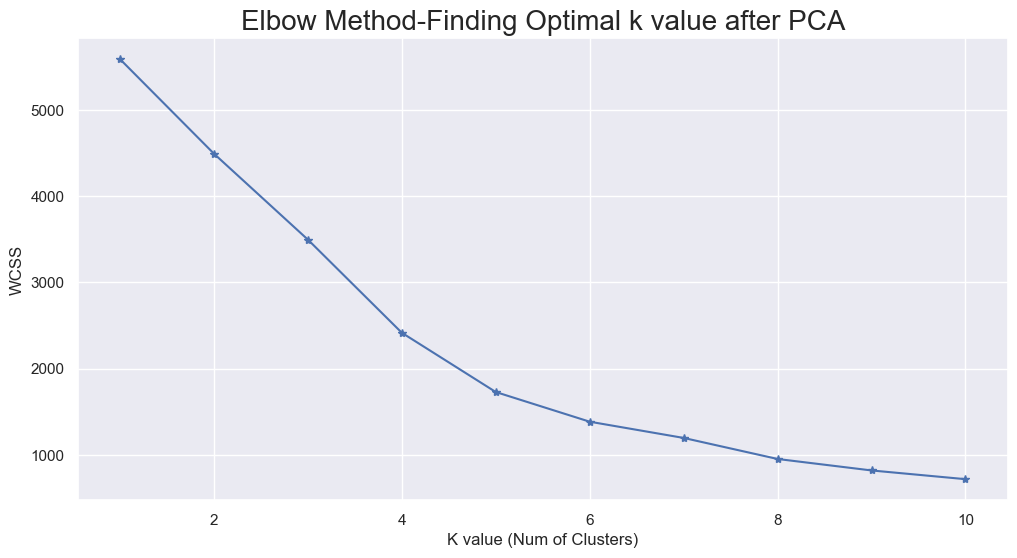

In [33]:
wcss= {}
sns.set()
plt.figure(figsize=(12,6))
for i in range(1,11): 
    km = KMeans(n_clusters=i)
    km.fit(pcadf)
    wcss[i]=km.inertia_

plt.plot(range(1,11),wcss.values(), marker='*')
plt.title('Elbow Method-Finding Optimal k value after PCA', fontsize =20)
plt.xlabel('K value (Num of Clusters)')
plt.ylabel('WCSS')
plt.show()

- Here the optimum number of cluster is 5 cluster since it is the place where the graph start to flatten out meaning that having higher number of cluster will not yield a much more fitting machine.

**Reports:**

* We will use **k = 5**, thus there will be **three clusters** in our dataset.
* We will use **KMeans Algorithm** for clustering.

#### Silhoutte Score Plot for K-Means to choose best number of clusters

For n_clusters = 3 The average silhouette_score is : 0.4124733636685198
For n_clusters = 4 The average silhouette_score is : 0.451884710933125
For n_clusters = 5 The average silhouette_score is : 0.38991624659731294
For n_clusters = 6 The average silhouette_score is : 0.39756863920520913
For n_clusters = 7 The average silhouette_score is : 0.3672959566888239


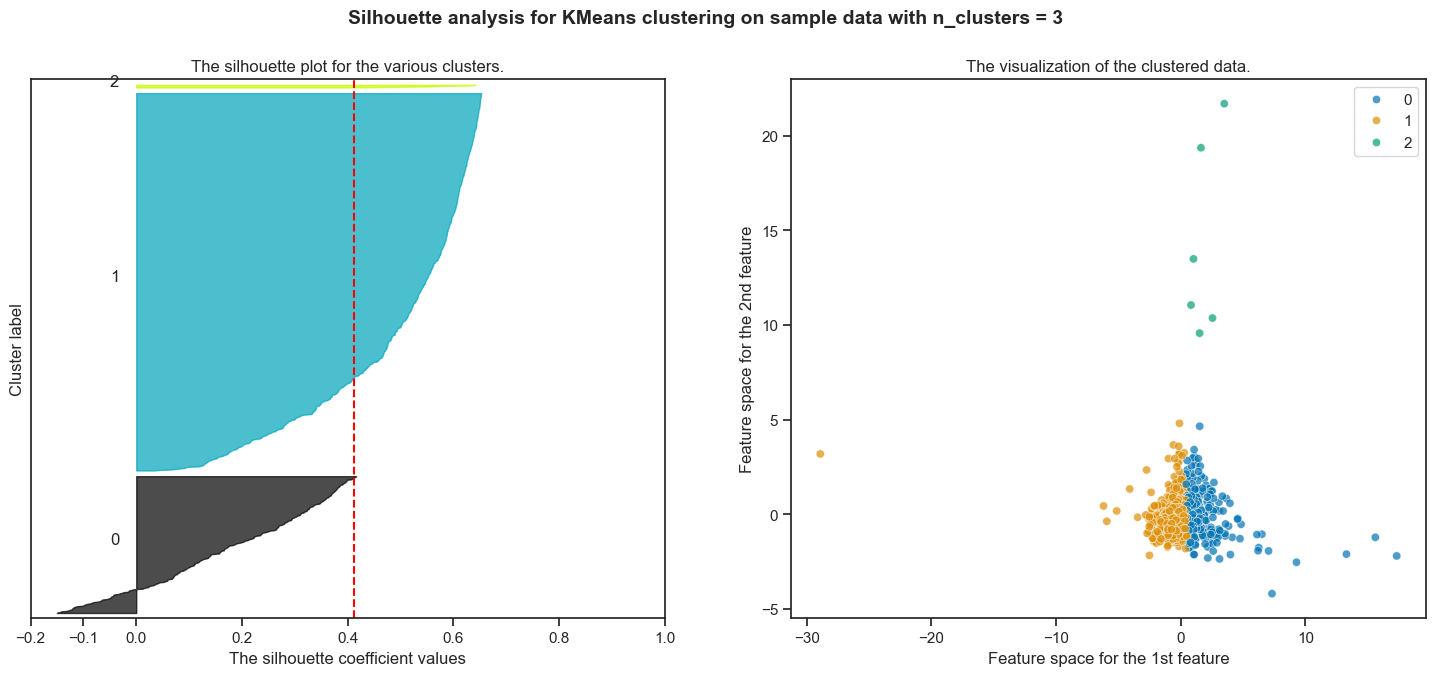

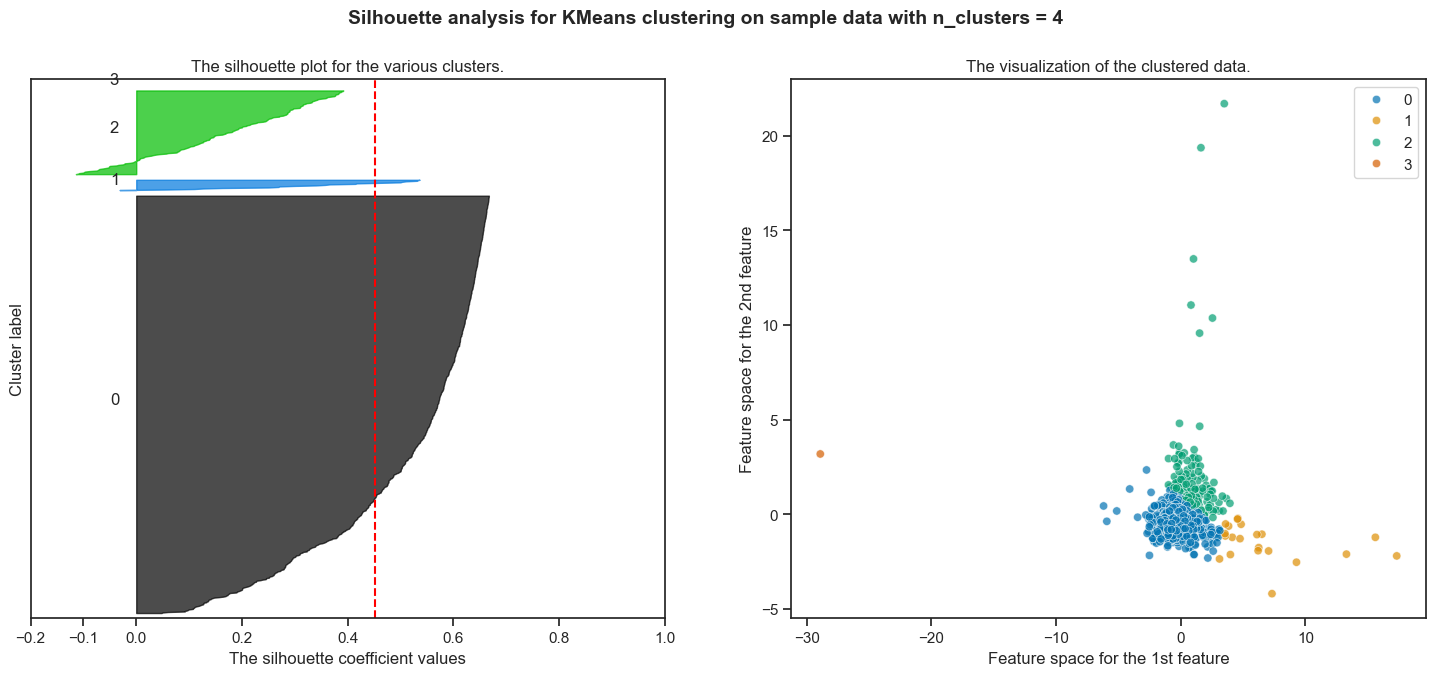

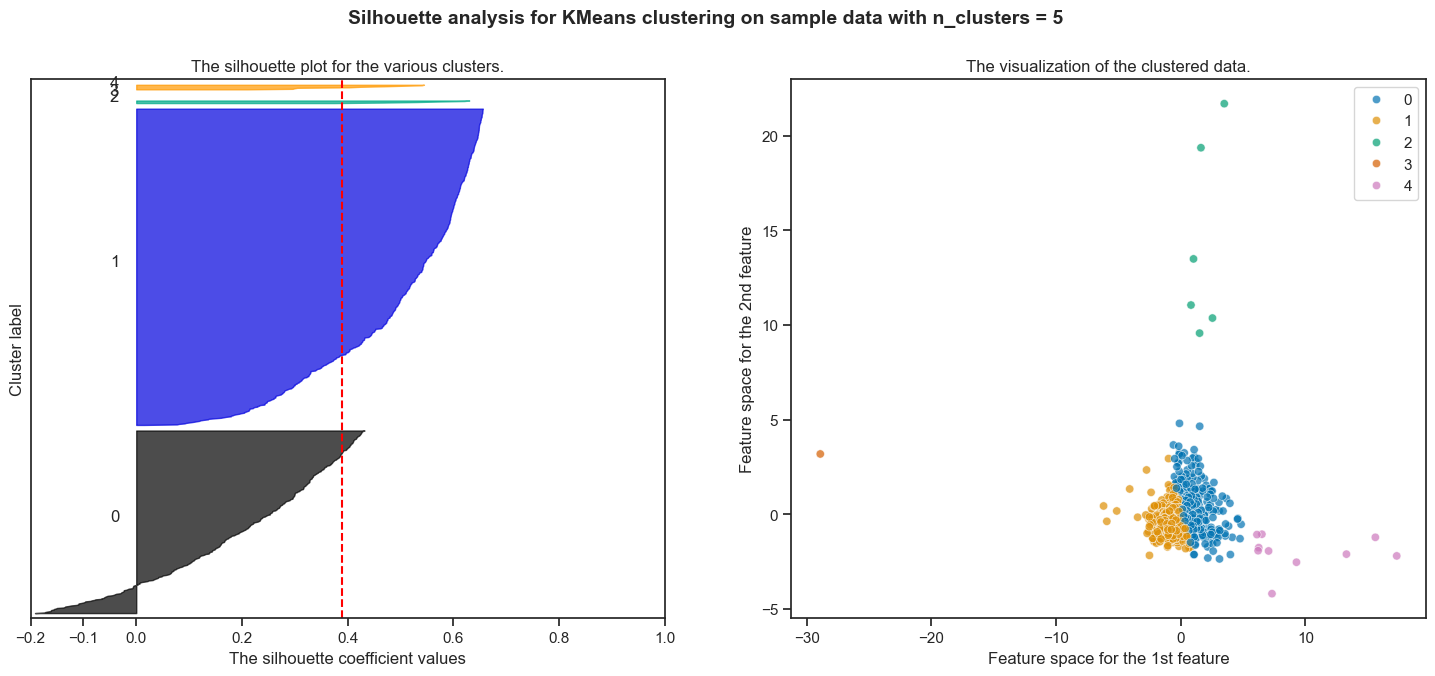

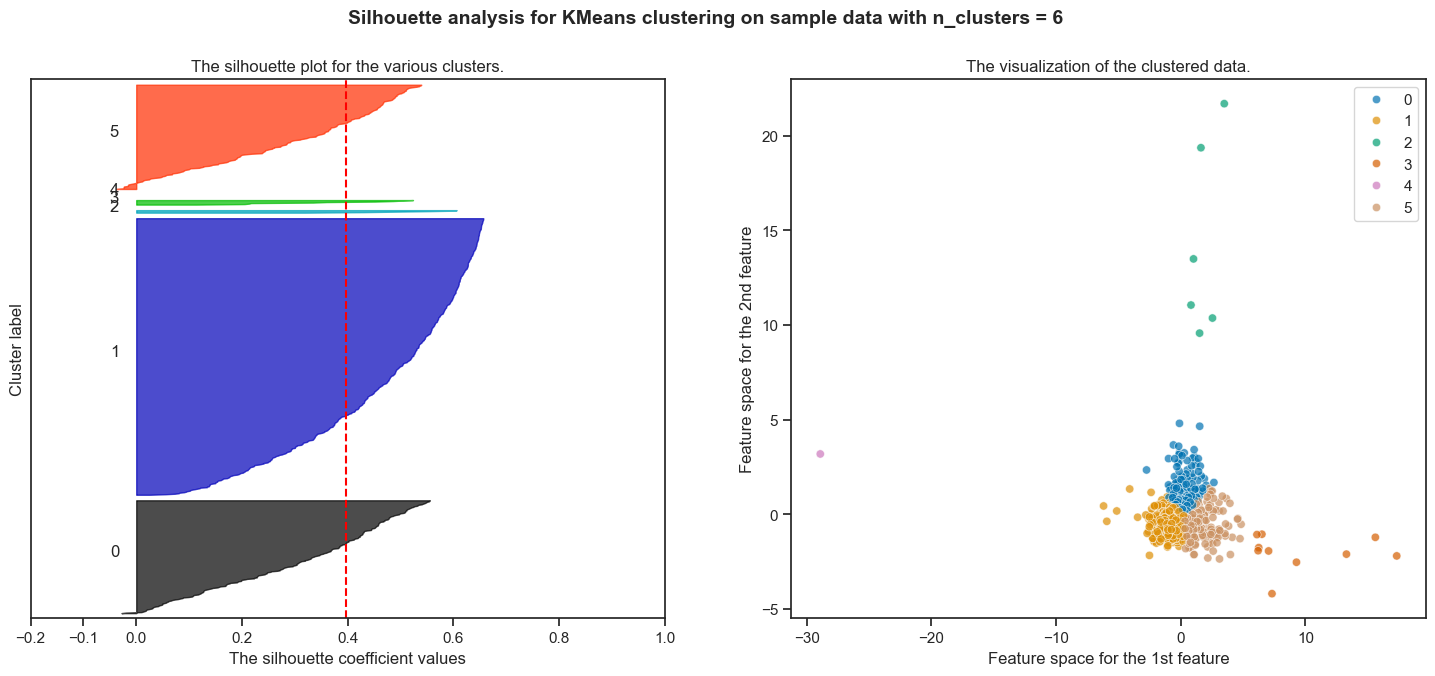

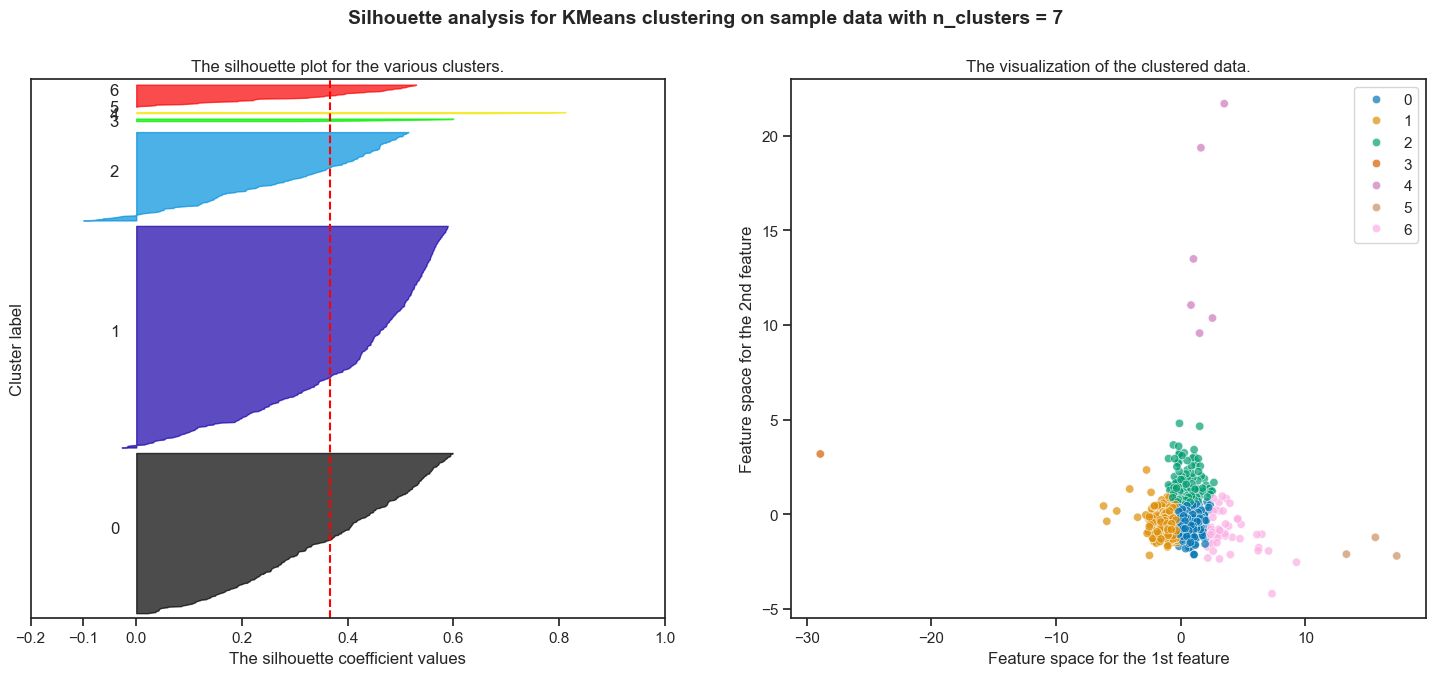

In [34]:
# We plot silhoutte score for Kmeans
# Here pcadf is pca dataframe, and Reduced is array of data after PCA.
sns.set_style('ticks')
silhouette_plot(KMeans,range(3,8), pcadf, reduced)


##### For n_clusters = 3 The average silhouette_score is : 0.5723097964476415
##### For n_clusters = 4 The average silhouette_score is : 0.5785546906586574
##### For n_clusters = 5 The average silhouette_score is : 0.38758367039600866
##### For n_clusters = 6 The average silhouette_score is : 0.39046650381293324
##### For n_clusters = 7 The average silhouette_score is : 0.36037743371243075

**Conclusions**
* Clusters of 3 has good balance of Inertia and Shilloute score, we can go with with 3 clusters.

### Apply Kmeans Clustering with 3 clusters

In [35]:
# Fitting the model to reduced data
model = KMeans(n_clusters=3).fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_

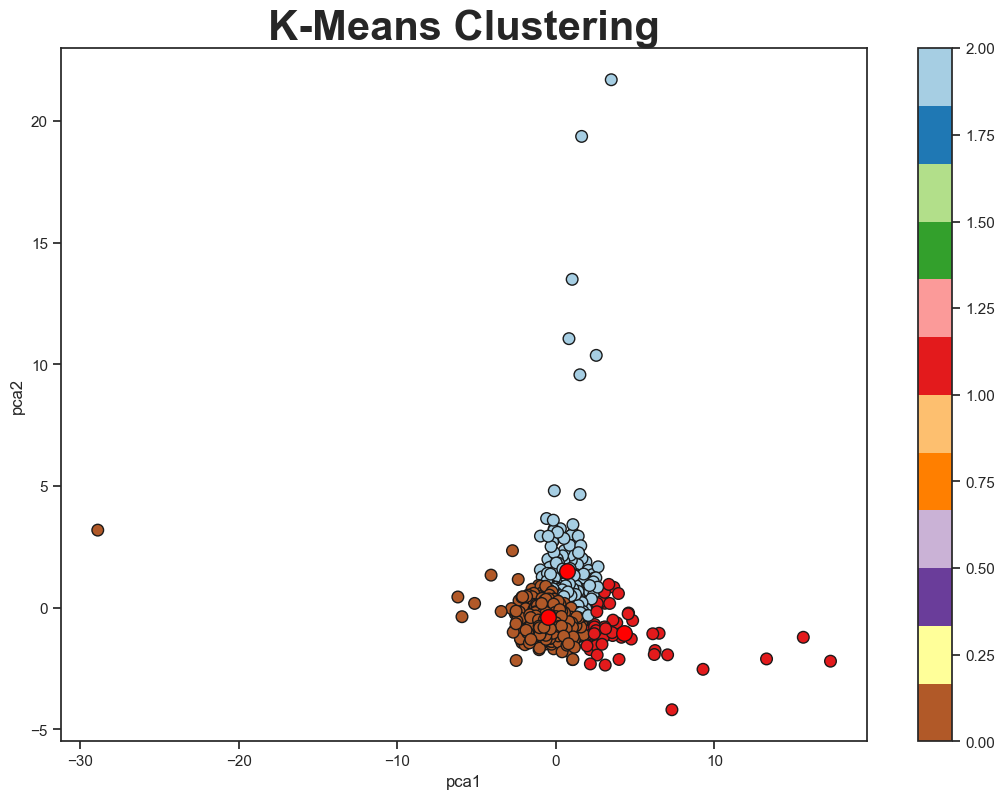

In [36]:
#Plotting the clusters
plt.figure(figsize=(13,9))
plt.title('K-Means Clustering', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=70, cmap='Paired_r', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='.',s=500, ec='k')

### Hierarchical clustering (Agglomerative)
* Agglomerative Clustering: Also known as bottom-up approach or hierarchical agglomerative clustering (HAC). 
* A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. 
* Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data.

#### Silhoutte Score Plot for Agglomerative Clustering to choose best number of clusters
- We will go with the n_clusters range of 2-4 to find the best cluster for Agglomerative clustering

For n_clusters = 3 The average silhouette_score is : 0.5849603961112136
For n_clusters = 4 The average silhouette_score is : 0.5909554537154686
For n_clusters = 5 The average silhouette_score is : 0.28775385747719096
For n_clusters = 6 The average silhouette_score is : 0.2926019080062572


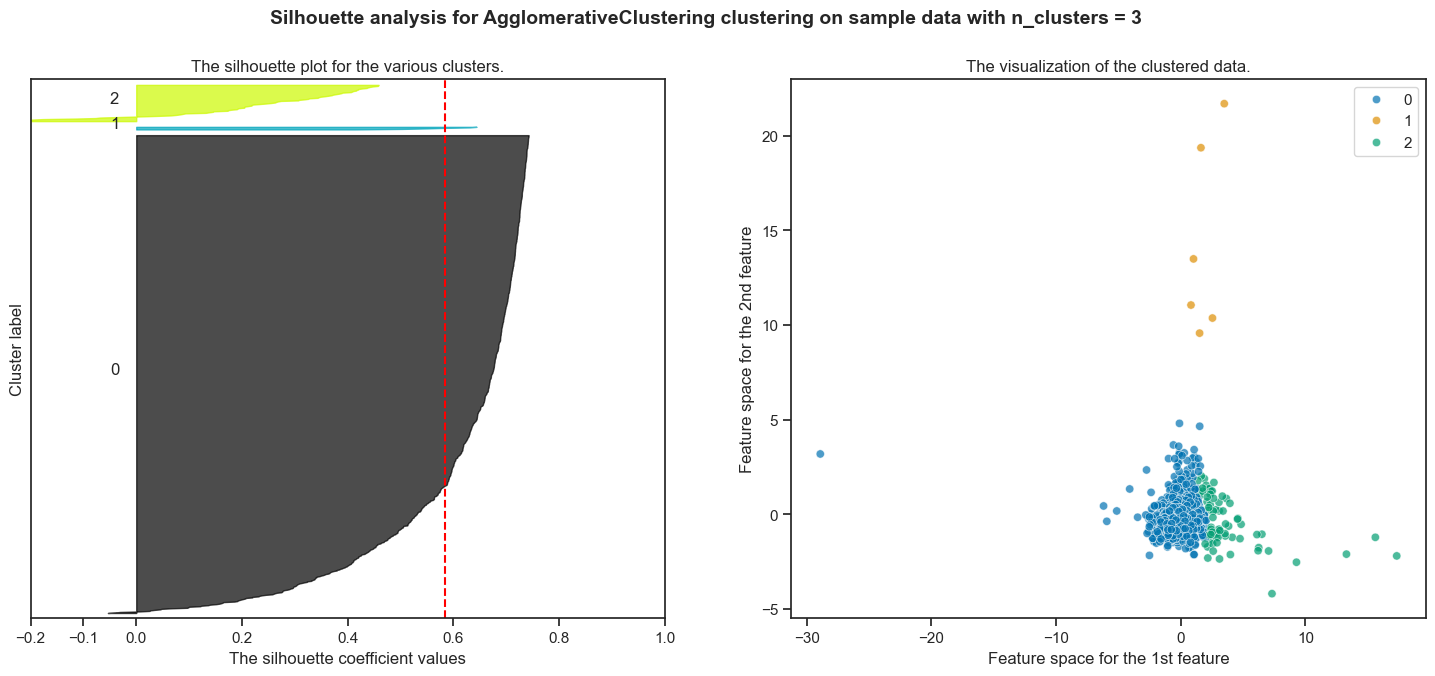

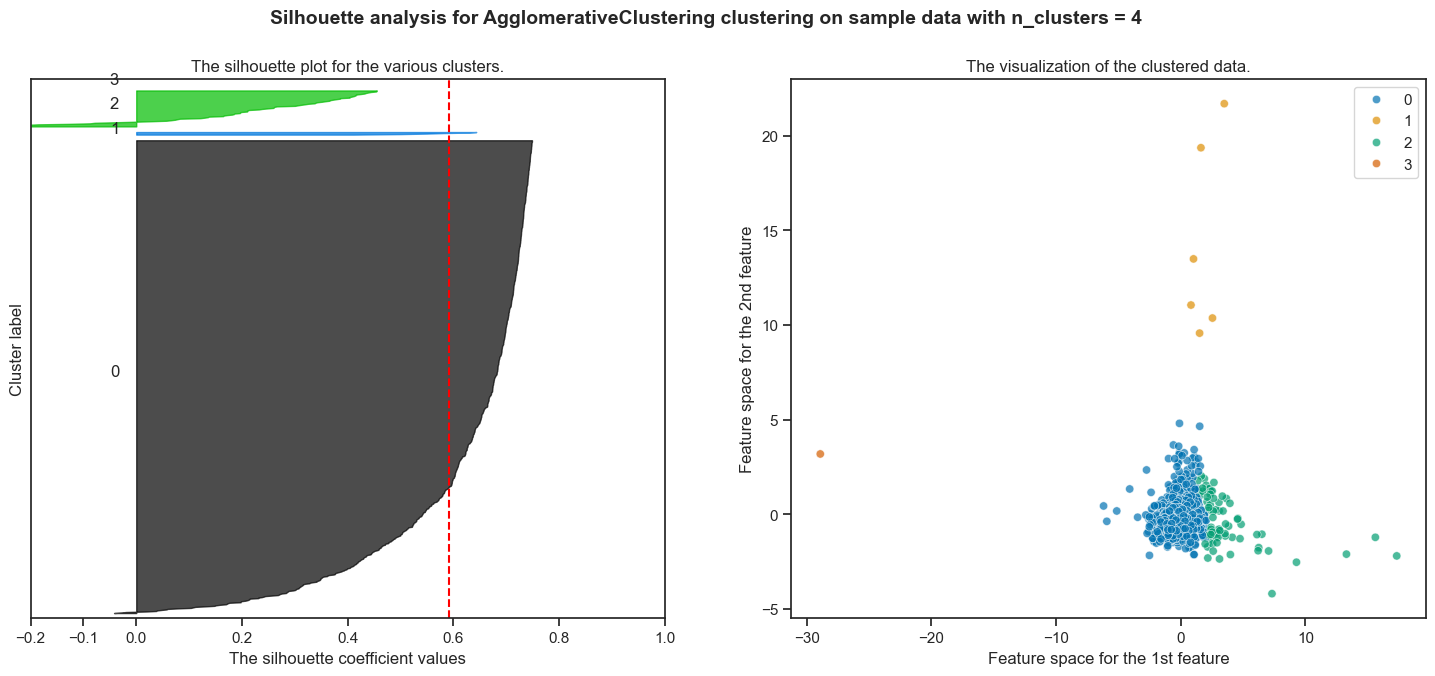

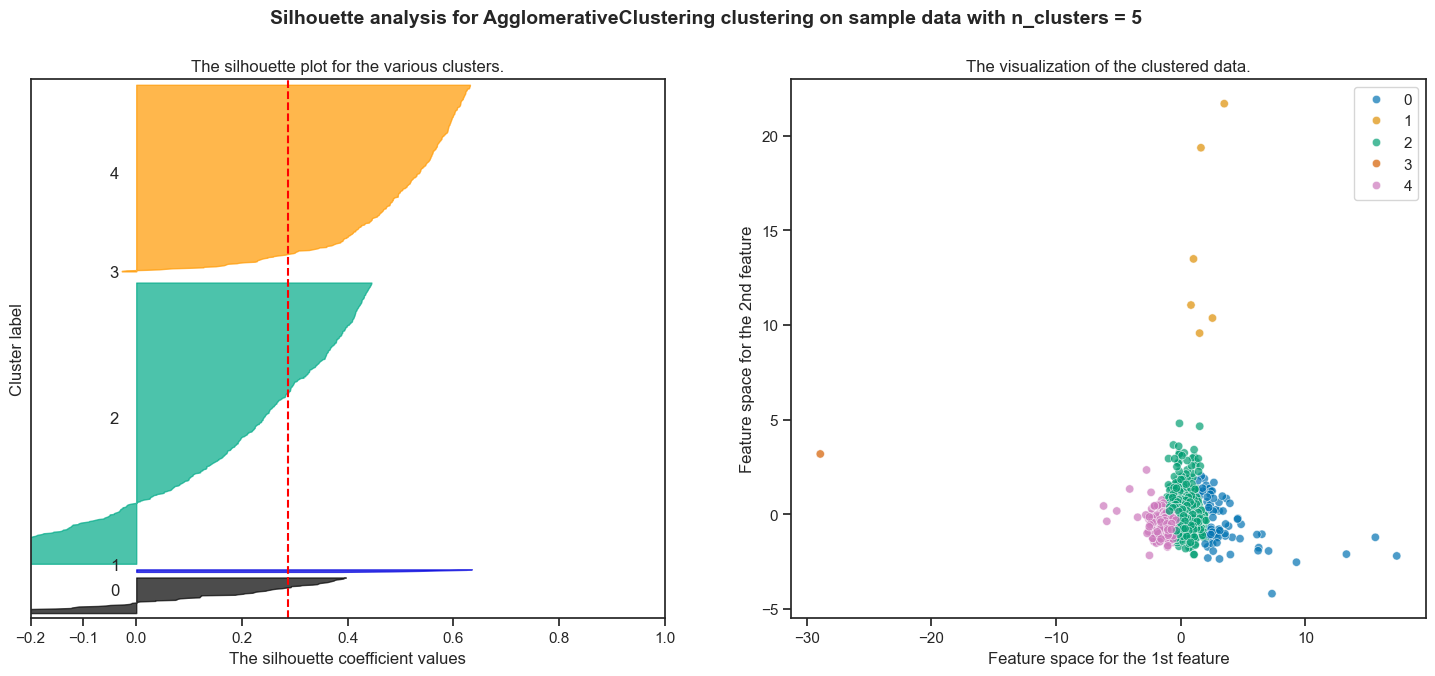

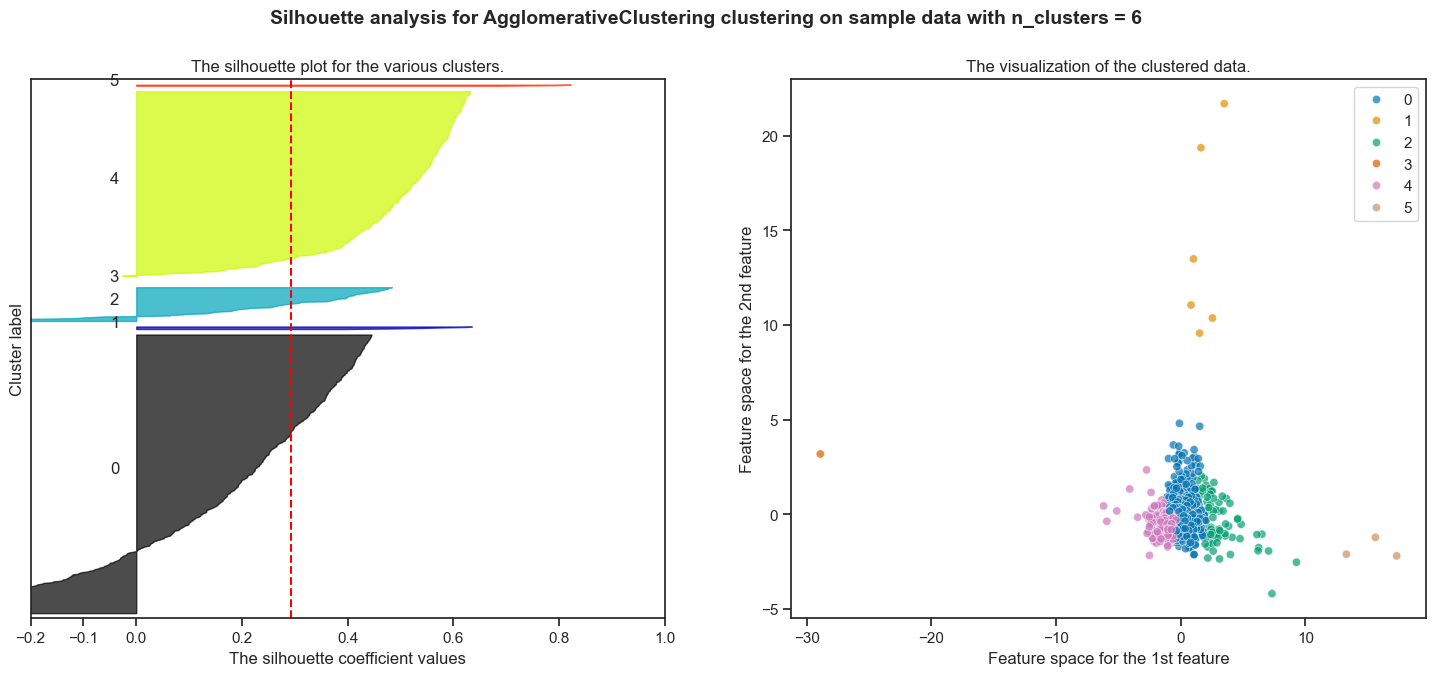

In [37]:
from sklearn.cluster import AgglomerativeClustering
#Plot Score to choose best clusters
silhouette_plot(AgglomerativeClustering,range(3,7),pcadf,reduced)

#### Visualization of Agglomerative Clustering

best average silhouette_score is : 0.826

#### For n_clusters = 3 The average silhouette_score is : 0.5849603961112063
#### For n_clusters = 4 The average silhouette_score is : 0.5909554537154614
#### For n_clusters = 5 The average silhouette_score is : 0.2877538574771369
#### For n_clusters = 6 The average silhouette_score is : 0.29260190800620317

**Conclusions**
* Clusters of  4 has good balance of Inertia and Shilloute score, we can go with with 4 clusters.

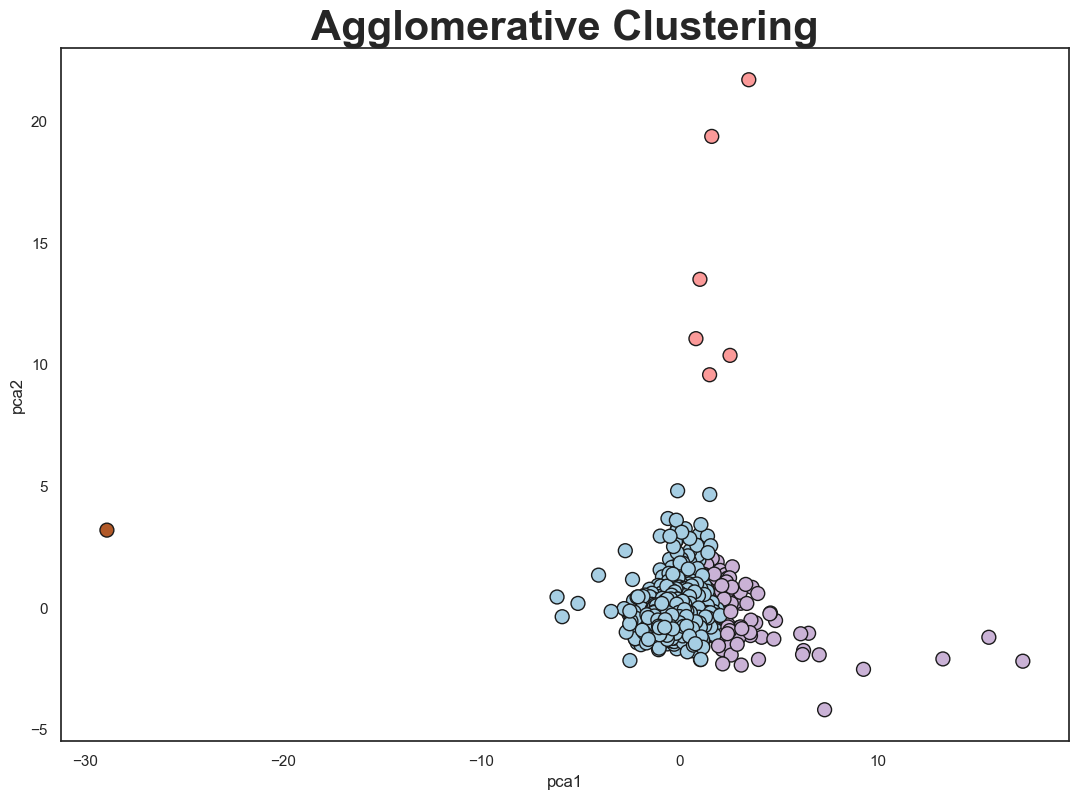

In [38]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(reduced)
model_label = model.labels_
plt.figure(figsize=(13,9))

sns.set_style('white')
plt.title('Agglomerative Clustering', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=100, cmap='Paired', ec='k')

**Report**
* Agglomerative clustering performed well than K means clustering.
* The best Silhoutte score is 0.8291, were as K means had 0.823 Silhoutte score.

## Gaussian Mixture
- A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.
- One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

For n_clusters = 3 The average silhouette_score is : 0.5850873072086279
For n_clusters = 4 The average silhouette_score is : 0.5361279100605807
For n_clusters = 5 The average silhouette_score is : 0.372364228076687
For n_clusters = 6 The average silhouette_score is : 0.3764373786597437
For n_clusters = 7 The average silhouette_score is : 0.34670766734232233


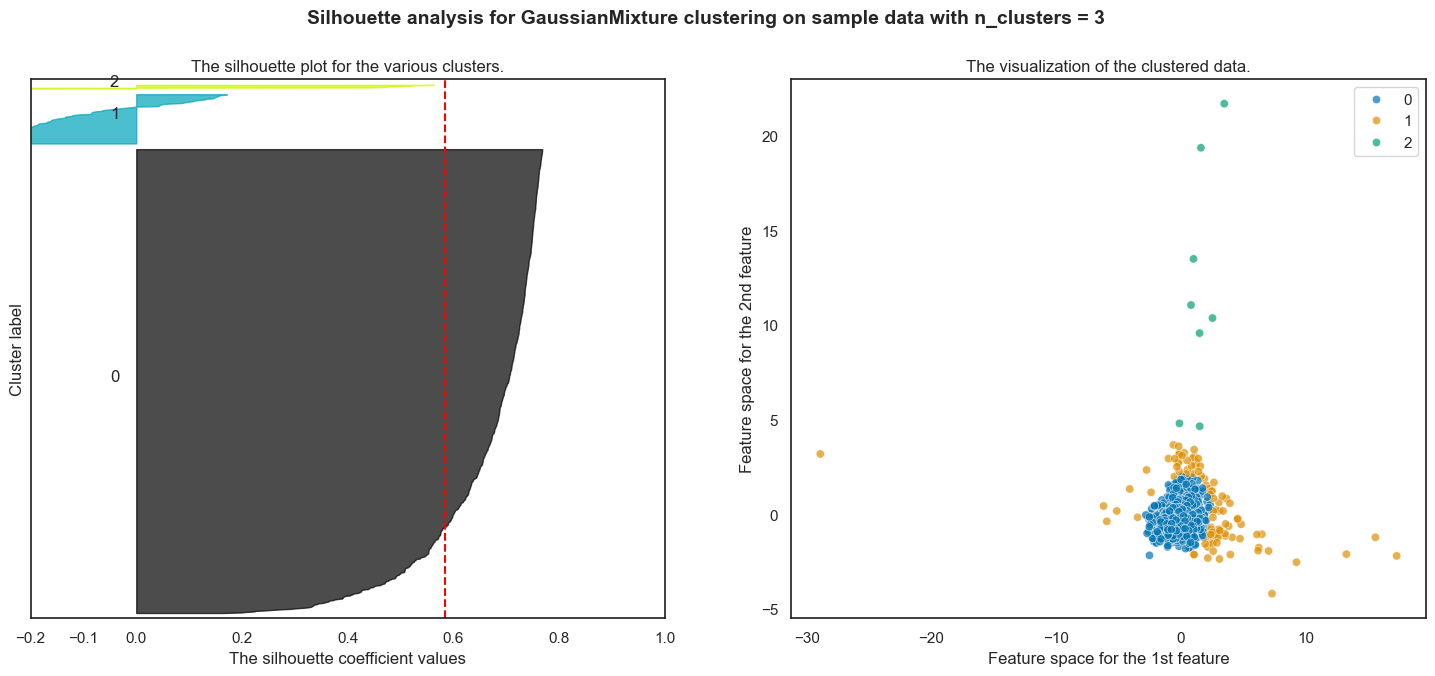

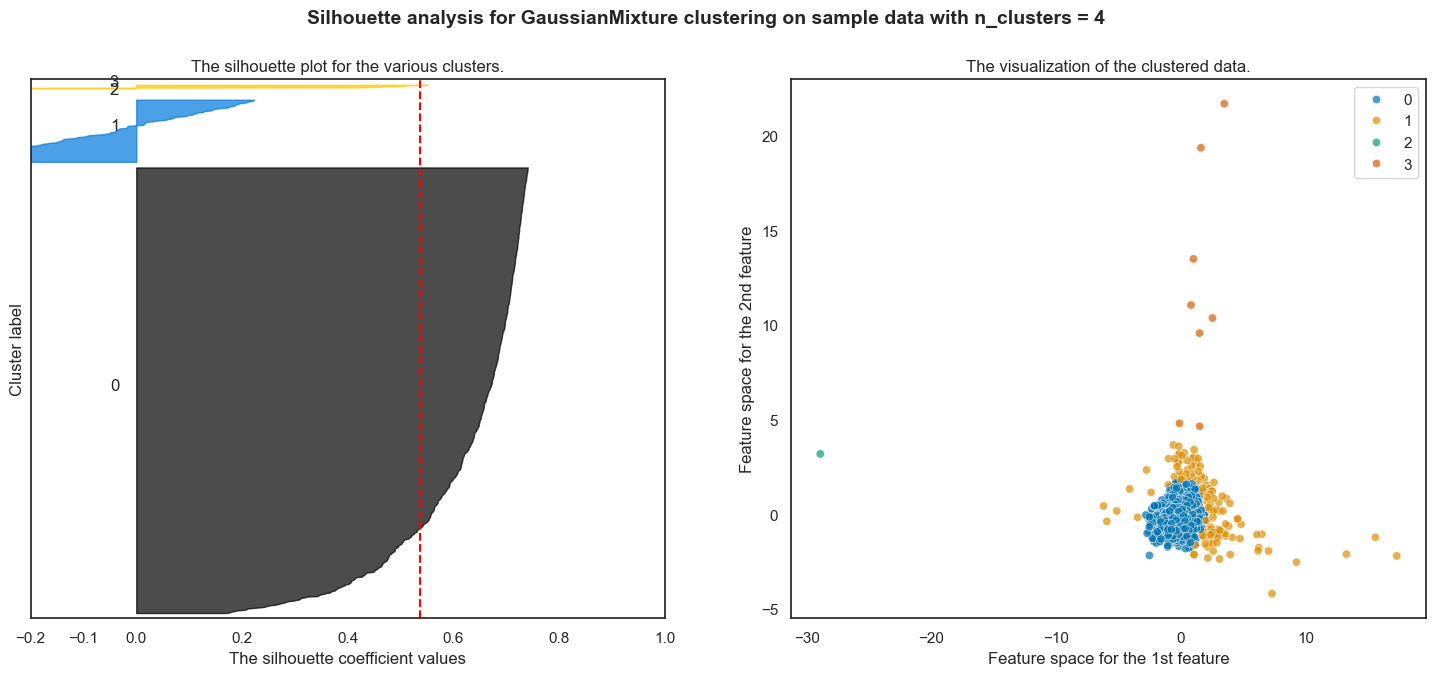

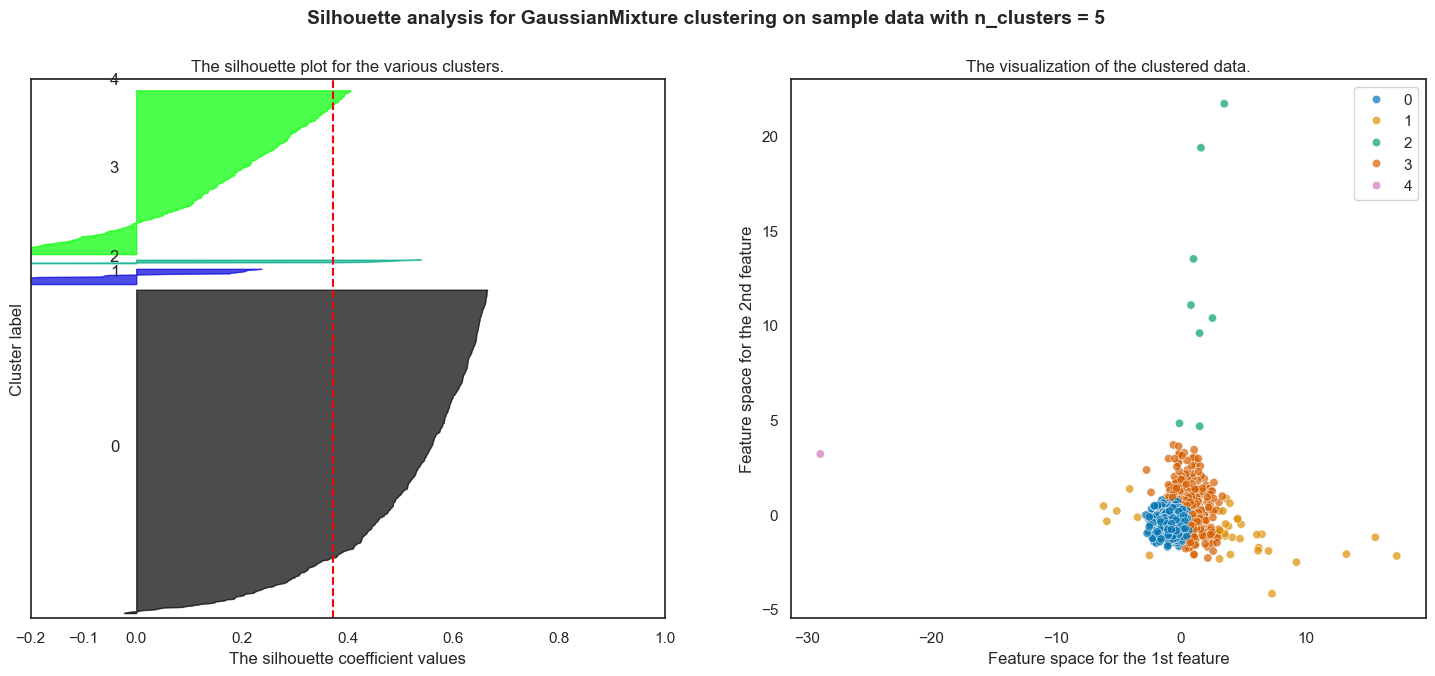

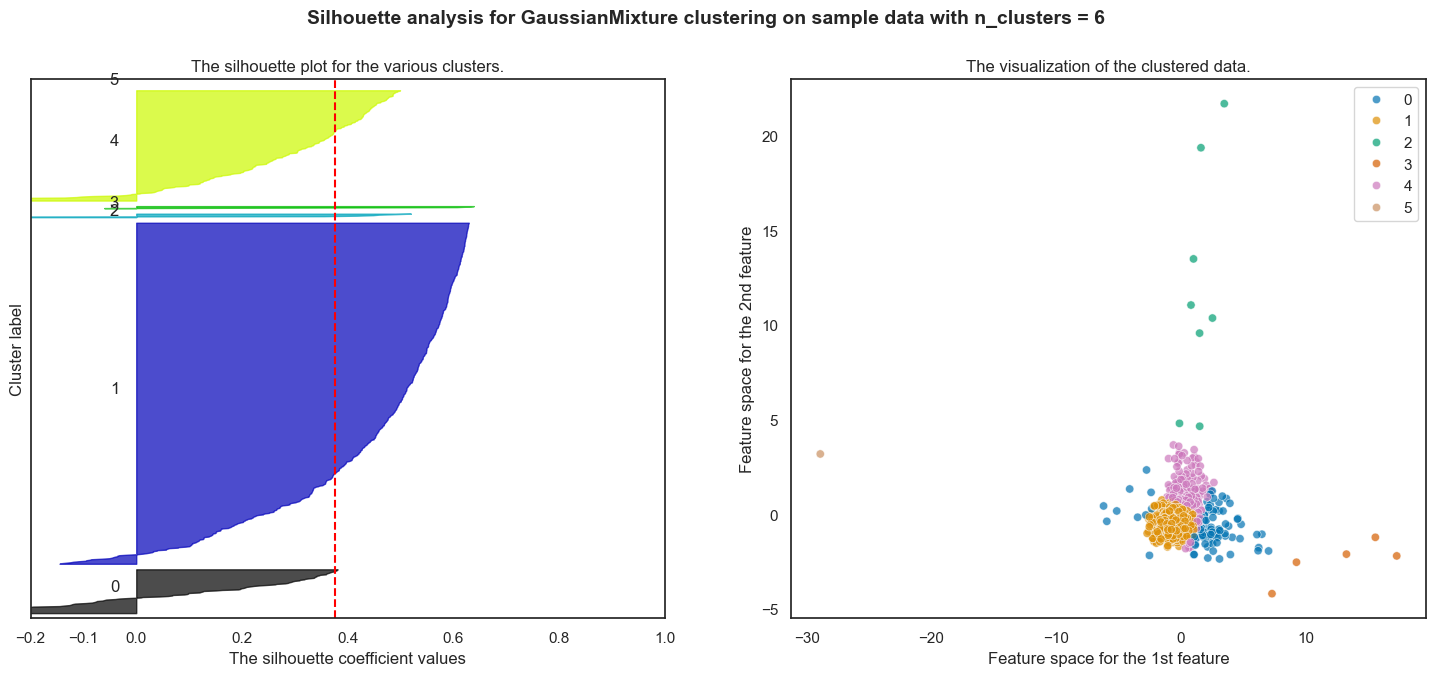

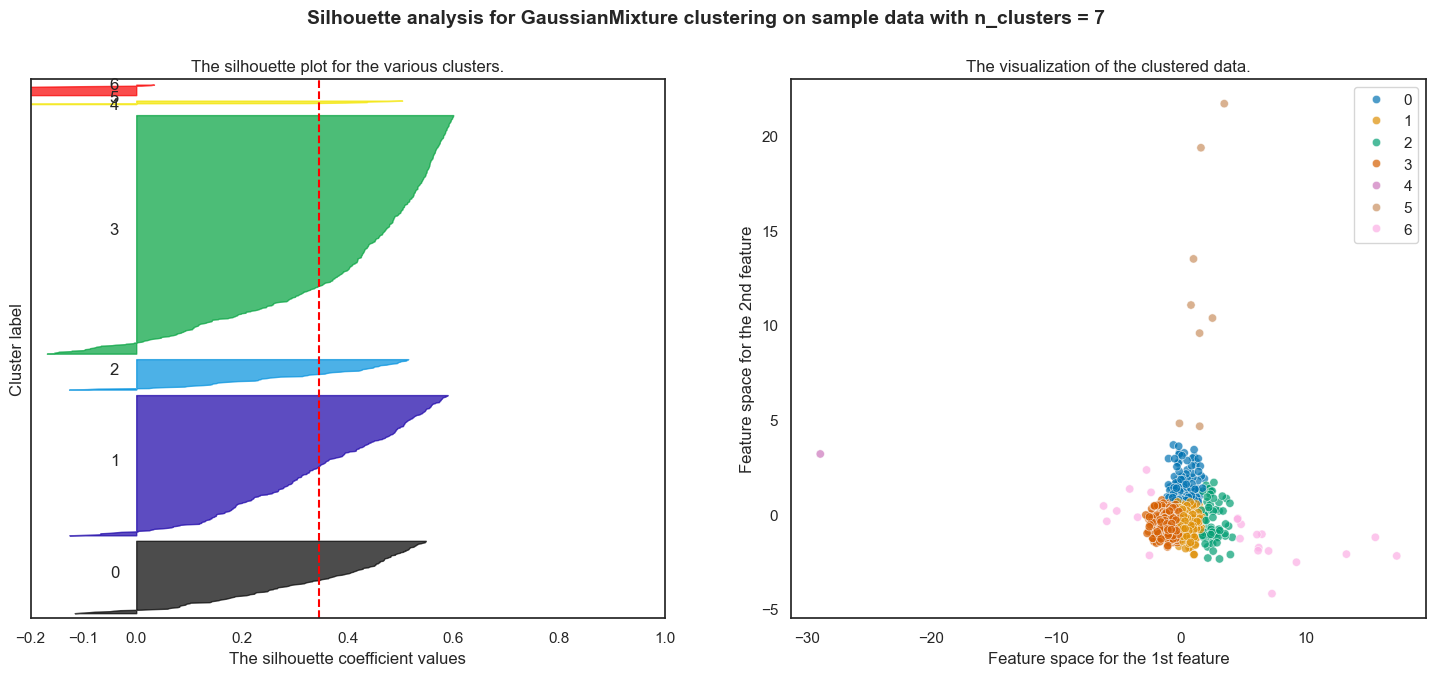

In [39]:
#plotting silhoutte score for Gaussian score
from sklearn.mixture import GaussianMixture
silhouette_plot(GaussianMixture,range(3,8),pcadf,reduced)

### for Gaussian Mixture
#### For n_clusters = 3 The average silhouette_score is :  0.585

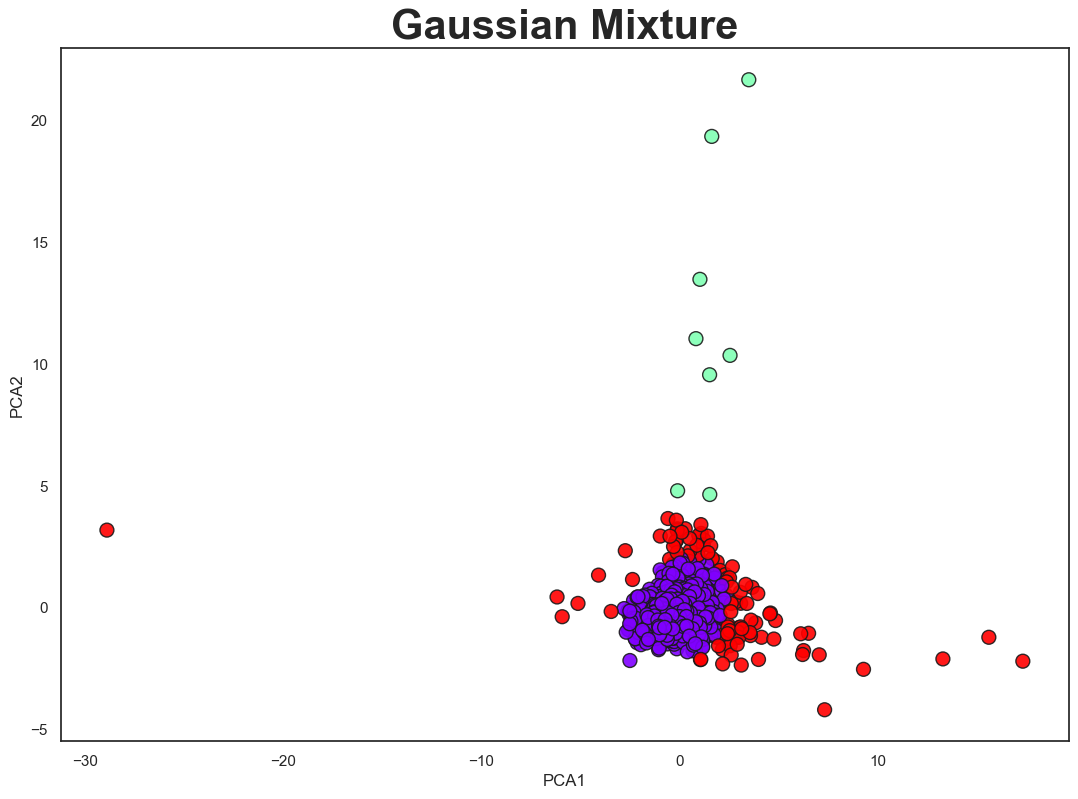

In [40]:
#plotting gaussian mixture with 7 clusters
model = GaussianMixture(n_components=3,random_state=42).fit(reduced)
model_label = model.predict(reduced)
plt.figure(figsize=(13,9))

sns.set_style('white')
plt.title('Gaussian Mixture', weight='bold', size=30)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=100, cmap='rainbow', ec='k', alpha=0.9)

### DBSCAN Clustering
* Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm.
* DBSCAN algorithm group points based on distance measurement, usually the Euclidean distance and the minimum number of points. An essential property of this algorithm is that it helps us track down the outliers as the points in low-density regions; hence it is not sensitive to outliers as is the case of K-Means clustering.

### Finding the Optimal value of Epsilon

Rather than experimenting with different values of epsilon, we can use the elbow point detection method to arrive at a suitable value of epsilon.

In this approach, the average distance between each point and its k nearest neighbors is calculated where k = the MinPts selected.

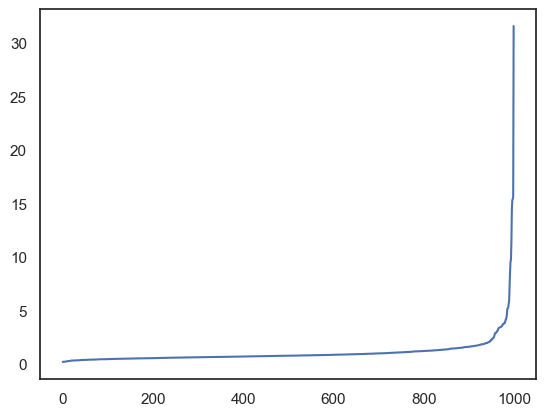

In [41]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

neighbors = NearestNeighbors(n_neighbors=17)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)

distances = np.sort(distances, axis=0)

distances = distances[:,2]
plt.plot(distances)
plt.show()

### **Kneedle algorithm**

* We’ll use the Kneedle algorithm here via Kevin Arvai’s excellent Python implementation called Kneed. You can download this via PyPi by entering `pip3 install kneed` into your terminal and then importing the package with `from kneed import KneeLocator`.


<Figure size 500x500 with 0 Axes>

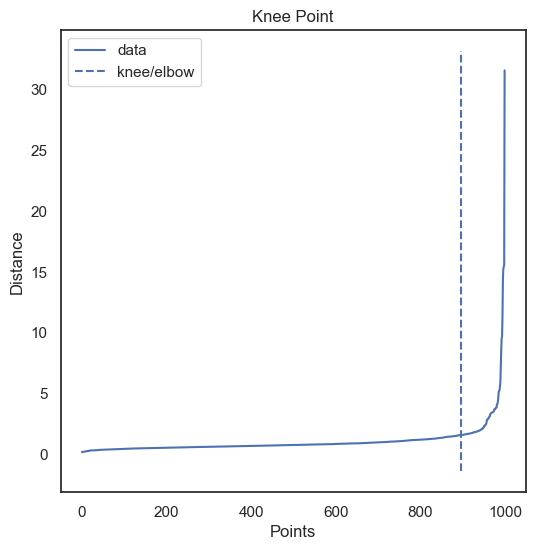

Knee Locator k = 1.6127911585674475


In [42]:

from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= distances[knee.knee]
print('Knee Locator k =', k)

### Plot using PCA

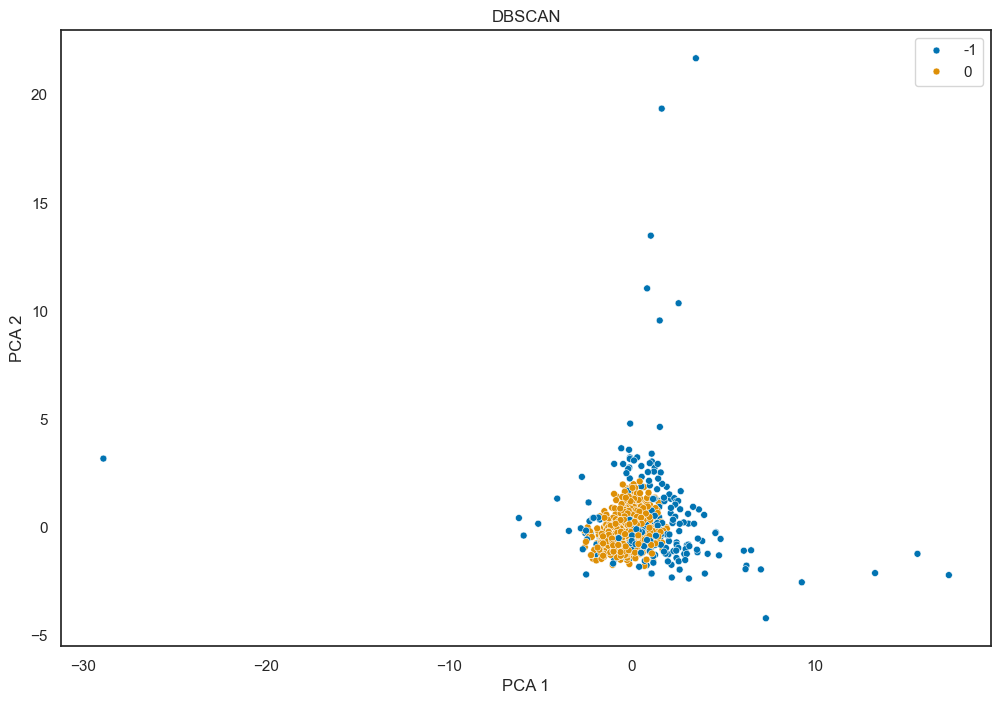

In [43]:
model=DBSCAN(eps=k , min_samples=100).fit(df_scaled)
model_label = model.labels_
plt.figure(figsize=(12,8))

plt.title('DBSCAN')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
scatter = sns.scatterplot(x = reduced[:,0], y = reduced[:,1], hue= model_label,
                      palette=sns.color_palette("colorblind", len(set(model_label))), s=25)

### DBSCAN didn't perform well in clustering.
- Its clear that DBSCAN does not work to well when we are dealing with clusters of varying densities or with high dimensional data

### Final Model

As Kmeans Clustering performed well than rest of the other algorithms, we will go with this

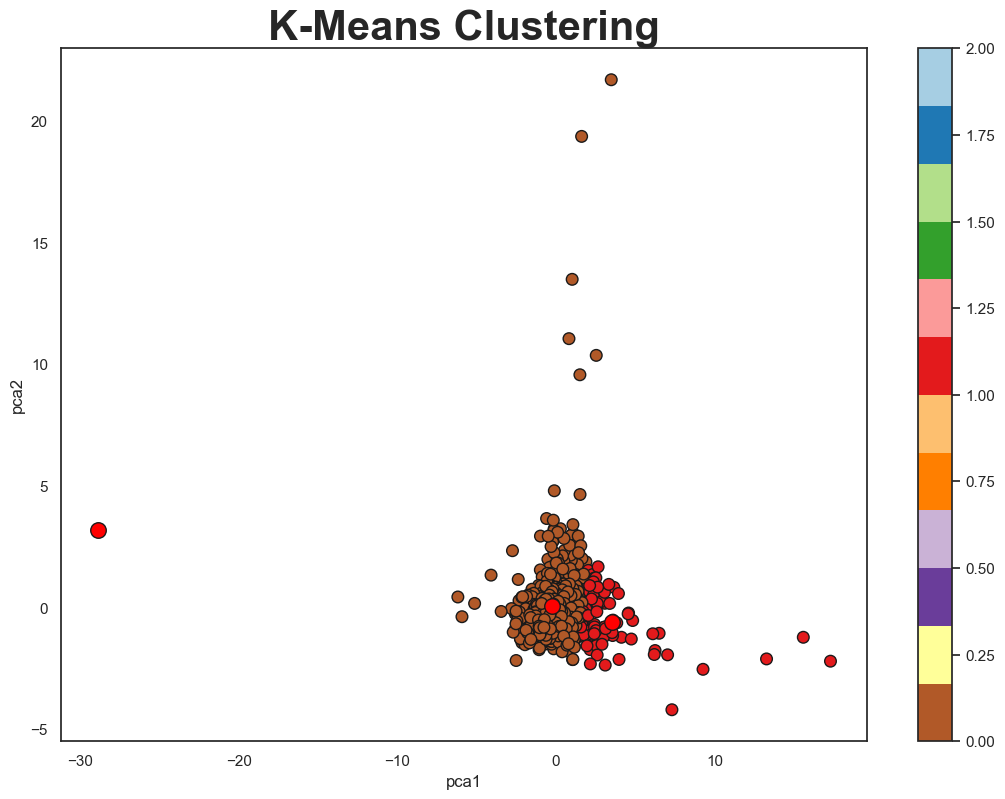

In [44]:
# Fitting the model to reduced data
model = KMeans(n_clusters=3).fit(pcadf)
model_label = model.labels_
model_centers = model.cluster_centers_

#Plotting the clusters
plt.figure(figsize=(13,9))
plt.title('K-Means Clustering', weight='bold', size=30)
plt.xlabel('pca1')
plt.ylabel('pca2')
scatter = plt.scatter(pcadf['PC1'], pcadf['PC2'], c=model_label, s=70, cmap='Paired_r', ec='k')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='.',s=500, ec='k');

### Saving the data with cluster column

In [45]:
#save model labels as new feature
import os
df["cluster"] = model.labels_.astype(int)
os.makedirs('clustered_data')
df.to_csv("./clustered_data/clustered_data.csv", index=False)

### Final report

- A Final reports we got the EDA results, we used that same approaches here also. We extracted out some features to derive valuable meanings from the data and used those in model training.
- The data had outliers and multicollinearity, We created pipelines to handle those things
- We have used PCA to minimize the dimensionality of the data.
- Kmeans Clustering algorithm has performed better then rest of the other clustering algorithms. So we went with it.
- Outlier detection significantly improved distribution symmetry in high-variance features.
- The PowerTransformer was effective at normalizing skewed liquidity metrics.
- The engineered liquidity features provide meaningful new insights for downstream analytics and modeling.